# Erstellung des 2D-Plots
Zur Veranschaulichung historischer Messdaten der Schwingungsdauer eines Sekundenpendels wurde ein 2D-Plot gewählt

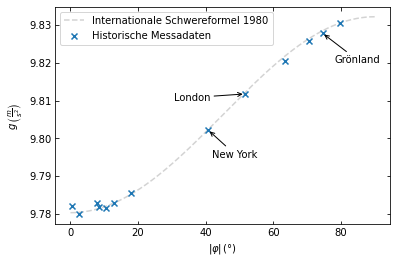

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

#CSV-File lesen
data = pd.read_csv("../input/visualisierung-data/data.csv")

def gravity_formula(x):
  '''
  :param float x: Breitengrad für den die Schwerebeschleuigung berechnet werden soll
  :return: Schwerebeschleunigung für Breitengrad x
  :rtype: float
  '''  
  gamma = 9.780327 
  beta = 5.3024e-3
  beta_1 = -5.8e-6
  return gamma * (1+ beta*(np.sin(np.radians(x)))**2 +  beta_1*(np.sin(np.radians(2*x)))**2) 

#Einfügen der gelesenen Messdaten in den Plot
plt.scatter(data["Latitude dec"], data["g m/s^2"], marker = 'x', label = 'Historische Messadaten', zorder=1)
#Einfügen der berechneten Werte in den Plot
plt.plot(np.linspace(0,90,10000), gravity_formula(np.linspace(0,90,10000)), label = 'Internationale Schwereformel 1980', color='lightgray', linestyle="--",zorder=-1)

#Beschriften markanter Punkte
plt.annotate('New York', xy=(40.71166667, 9.80219974),  xycoords='data',
            xytext=(41.9, 9.795), textcoords='data',  arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
plt.annotate('London', xy=(51.51833333, 9.811748445),  xycoords='data',
            xytext=(30.5, 9.81), textcoords='data',  arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
plt.annotate('Grönland', xy=(74.53833333, 9.827807515),  xycoords='data',
            xytext=(78, 9.82), textcoords='data',  arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
#Einstellen der Achsen
plt.tick_params('x', direction='in', bottom = True, top = True)
plt.tick_params('y', direction='in', left = True, right = True)
plt.xlabel(r"$|\varphi|\,($°$)$")
plt.ylabel(r"$g\,\left(\frac{m}{s^2}\right)$")
#Legende einblenden
plt.legend()

#Speichern und Anzeigen
plt.savefig("schwereformel.png", dpi=600)
plt.show()

# Erstellung des 3D-Plots
Zur Visualisierung der funktionalen Abhängigkeiten der horizontalen Coriolisbeschleunigung $a_\mathrm{hor.}$ von der Geschwindigkeit $v$ und dem Breitengrad $\varphi \in [-90°, 90°]$ wurde ein 3D-Plot gewählt. 

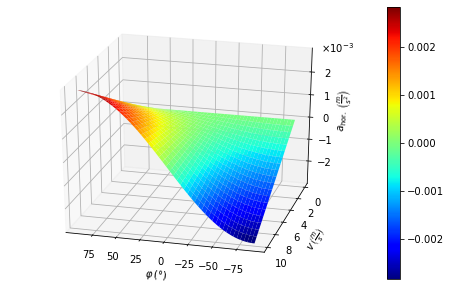

In [2]:
from mpl_toolkits.mplot3d import Axes3D

#Erstellen eines leeren 3D-Plots
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

#Einstellen der Achsen
ax.set_xlabel(r'$\varphi\,$(°)')
ax.set_ylabel(r'$v\,\left(\frac{m}{s}\right)$')
ax.set_zlabel(r'$a_\mathrm{hor.}\,\left(\frac{m}{s^2}\right)$')
ax.view_init(25,105)

#Berechnen der Werte
phi, v = np.meshgrid(np.linspace(-np.pi/2,np.pi/2,100), np.linspace(0,10.0,20)) 
z = 4 * 7.2921e-5 * np.sin(phi) * v

#Plotten
plot = ax.plot_surface(phi*360/(2*np.pi), v, z, cmap = plt.cm.jet, zorder=1, color='k', linewidth=.5, alpha=1)

#Zehnerpotenz aus der z-Achse ausklammern
plt.ticklabel_format(axis="z", style="sci", scilimits=(0,0))
ax.get_zaxis().get_offset_text().set_visible(False)
ax.annotate(r'$\times 10^{-3}$', xy=(.88, .83), xycoords='axes fraction')

#Farbskala einblenden
fig.colorbar(plot)

#Speichern und Anzeigen
plt.savefig('3d-plot.png', dpi = 1000)
plt.show()

# Animation 
Es wird die Bahn eines Foucaultschen Pendels im Laufe der Zeit animiert. 

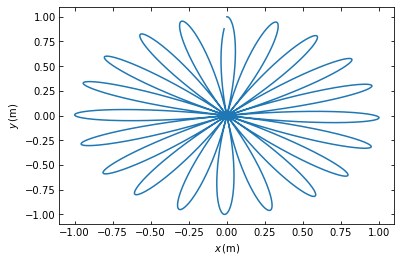

In [3]:
from matplotlib.animation import FuncAnimation
phi = 50
omega = 7.2921e-2
length = 20

def calc_route(t):
    x = np.cos(np.sqrt(gravity_formula(phi)/length)*t)*np.sin(np.cos(phi)*omega*t) 
    y = np.cos(np.sqrt(gravity_formula(phi)/length)*t)*np.cos(np.cos(phi)*omega*t)
    return x,y

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [])

def init():
    plt.tick_params('x', direction='in', bottom = True, top = True)
    plt.tick_params('y', direction='in', left = True, right = True)
    plt.xlabel('$x\,$(m)')
    plt.ylabel('$y\,$(m)')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    return ln,

def update(frame):
    x,y = calc_route(np.linspace(frame-1 if frame else 0, frame, 100))
    xdata.append(x)
    ydata.append(y)
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=range(90),
                    init_func=init, blit=True, interval=300, repeat = True)
ani.save('foucault_aninmation.mp4')
plt.savefig('poster.png', dpi = 1000)
plt.show()

